# Decision Tree Classification
Authored by: Faeze Abdoli, Fatemeh Hosseini

Student: Amirhossein Abolhasani

Student ID: 400405003

Course: Machine Learning

Date: Fall 2024

## Importations

In [1]:
# For working with data, loading, analysis and preprocessing
import pandas as pd

# To perform numerical calculations and work with arrays
import numpy as np

# To upload and download files in Google Colab
from google.colab import files

# For creating visualizations
from matplotlib import pyplot as plt

# For pretty-printing objects
import pprint

# To handle zip files
import zipfile

# For file and directory operations
import os

# For enhanced data visualization
import seaborn as sns

# For Progress bar in terminal
from tqdm import tqdm

# For dataset splitting
from sklearn.model_selection import train_test_split

# For measuring inference time
import time

# For getting possible combination of features
from itertools import combinations

## Loading Dataset 📉💰💸

In [2]:
# If you are running this in Colab, uncomment and run the code.
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download ayessa/salary-prediction-classification



cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/ayessa/salary-prediction-classification
License(s): unknown
  0% 0.00/460k [00:00<?, ?B/s]
100% 460k/460k [00:00<00:00, 71.3MB/s]


In [3]:
# If you are running this in Colab, uncomment and run the code.
with zipfile.ZipFile('salary-prediction-classification.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/salary')

In [4]:
data = pd.read_csv('/content/salary/salary.csv')

## EDA and Data Preprocessing

### Quick Information On the Data

In [5]:
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [6]:
print(f'Number of Samples : {len(data)}')

Number of Samples : 32561


In [7]:
print(f'Number of Columns: {len(data.columns)}')
print('==========================')
print(f'Dataset Columns: {data.columns}')

Number of Columns: 15
Dataset Columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')


In [8]:
print("\nUnique Data in Each Column:")
print("*******************")
for column in data.columns:
    unique_values = data[column].unique()
    print(f"{column}: {len(unique_values)} unique values")
    print(unique_values)
    print("=======================================")



Unique Data in Each Column:
*******************
age: 73 unique values
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass: 9 unique values
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt: 21648 unique values
[ 77516  83311 215646 ...  34066  84661 257302]
education: 16 unique values
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education-num: 16 unique values
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status: 7 unique values
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation: 15 unique 

### Handle Missing Values

In [9]:
print("NaN Values")
print(data.isna().sum())
print("===================")
print("Null Values")
print(data.isnull().sum())

NaN Values
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64
Null Values
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64


### Plots

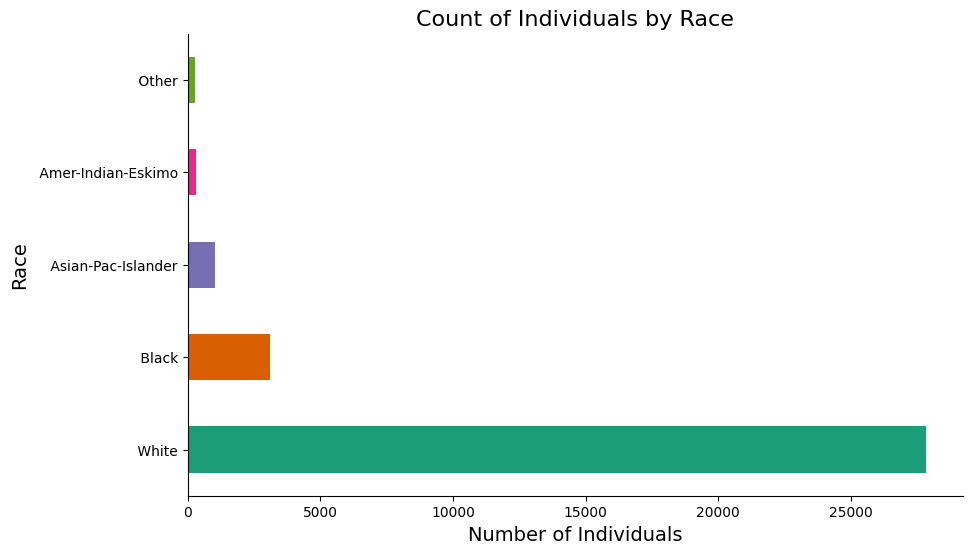

In [10]:
race_counts = data['race'].value_counts()

plt.figure(figsize=(10, 6))

race_counts.plot(kind='barh', color=sns.color_palette('Dark2', n_colors=len(race_counts)))
plt.title('Count of Individuals by Race', fontsize=16)
plt.xlabel('Number of Individuals', fontsize=14)
plt.ylabel('Race', fontsize=14)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

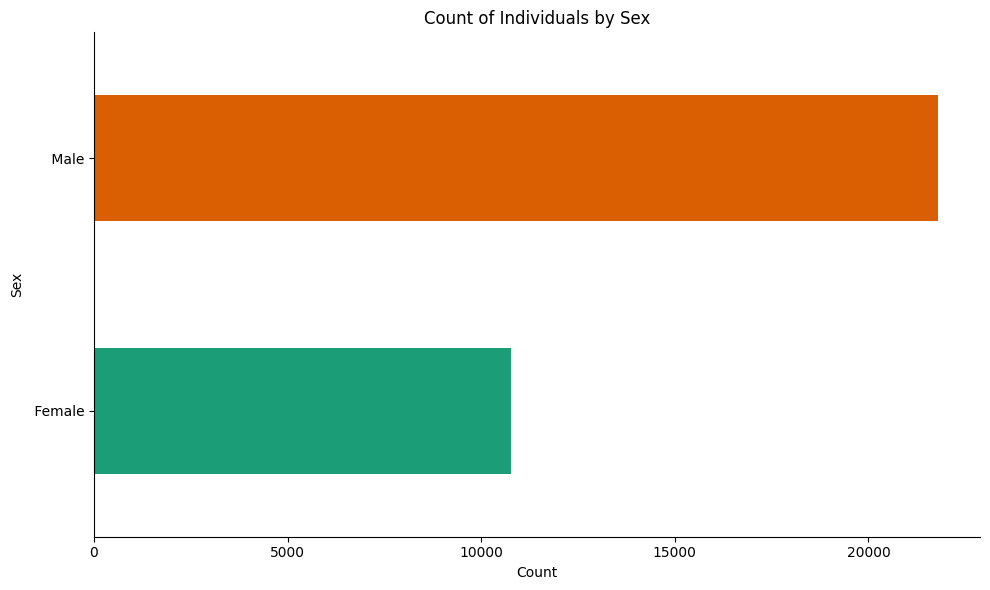

In [11]:
sex_counts = data.groupby('sex').size()
plt.figure(figsize=(10, 6))

sns.set_palette('Dark2')
sex_counts.plot(kind='barh', color=sns.color_palette())

plt.title('Count of Individuals by Sex')
plt.xlabel('Count')
plt.ylabel('Sex')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

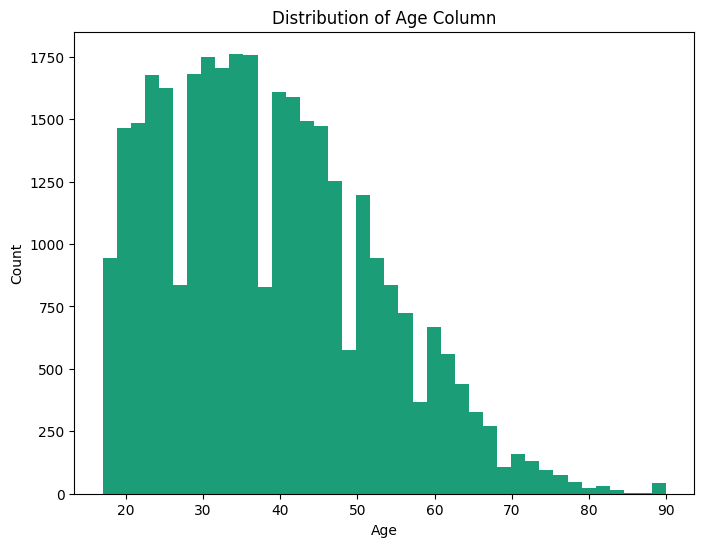

In [12]:
data['age'].hist(bins=40, figsize=(8, 6), grid=False)
plt.title('Distribution of Age Column')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

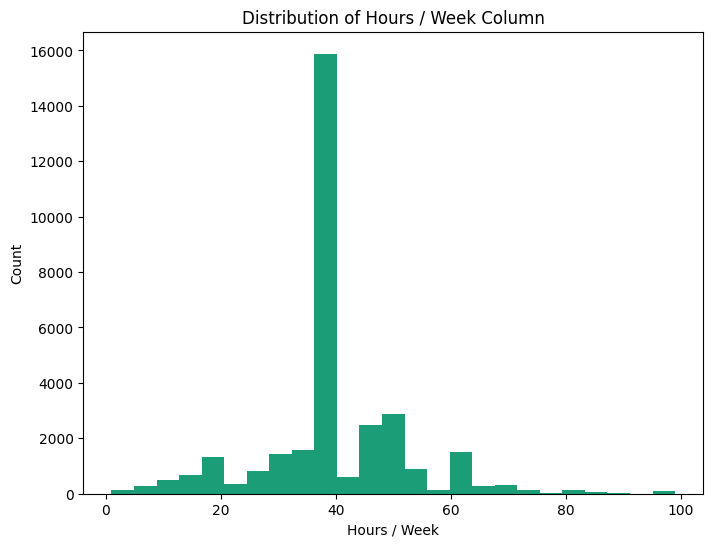

In [13]:
data['hours-per-week'].hist(bins=25, figsize=(8, 6), grid=False)
plt.title('Distribution of Hours / Week Column')
plt.xlabel('Hours / Week')
plt.ylabel('Count')
plt.show()

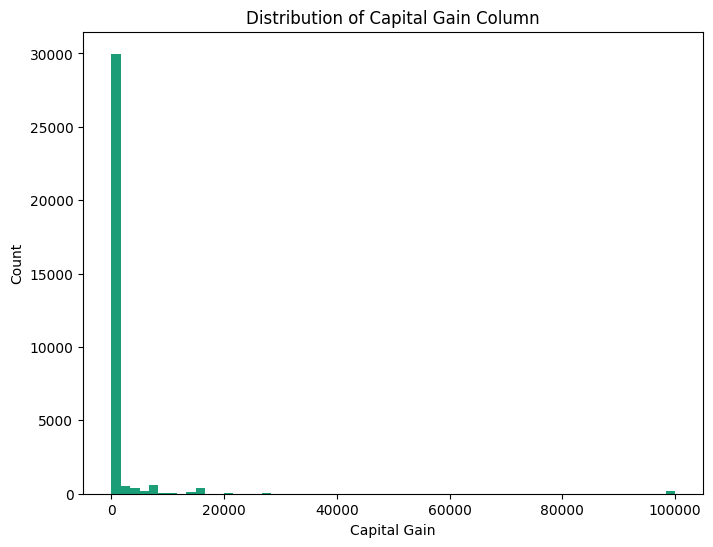

In [14]:
data['capital-gain'].hist(bins=60, figsize=(8, 6), grid=False)
plt.title('Distribution of Capital Gain Column')
plt.xlabel('Capital Gain')
plt.ylabel('Count')
plt.show()

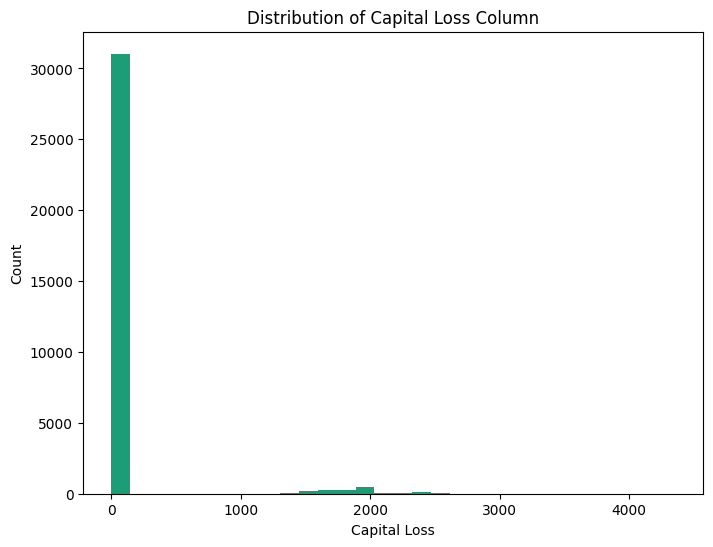

In [15]:
data['capital-loss'].hist(bins=30, figsize=(8, 6), grid=False)
plt.title('Distribution of Capital Loss Column')
plt.xlabel('Capital Loss')
plt.ylabel('Count')
plt.show()

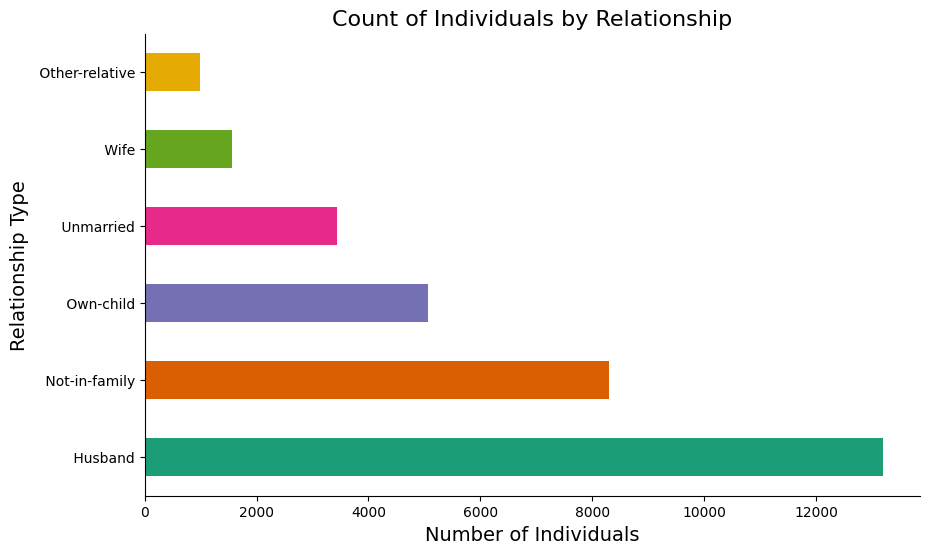

In [16]:
race_counts = data['relationship'].value_counts()

plt.figure(figsize=(10, 6))

race_counts.plot(kind='barh', color=sns.color_palette('Dark2', n_colors=len(race_counts)))
plt.title('Count of Individuals by Relationship', fontsize=16)
plt.xlabel('Number of Individuals', fontsize=14)
plt.ylabel('Relationship Type', fontsize=14)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

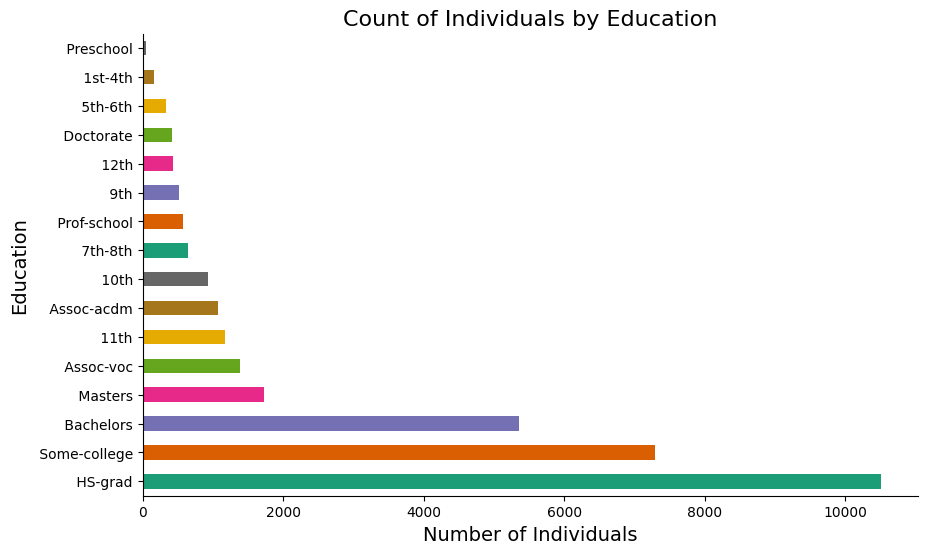

In [17]:
race_counts = data['education'].value_counts()

plt.figure(figsize=(10, 6))

race_counts.plot(kind='barh', color=sns.color_palette('Dark2', n_colors=len(race_counts)))
plt.title('Count of Individuals by Education', fontsize=16)
plt.xlabel('Number of Individuals', fontsize=14)
plt.ylabel('Education', fontsize=14)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

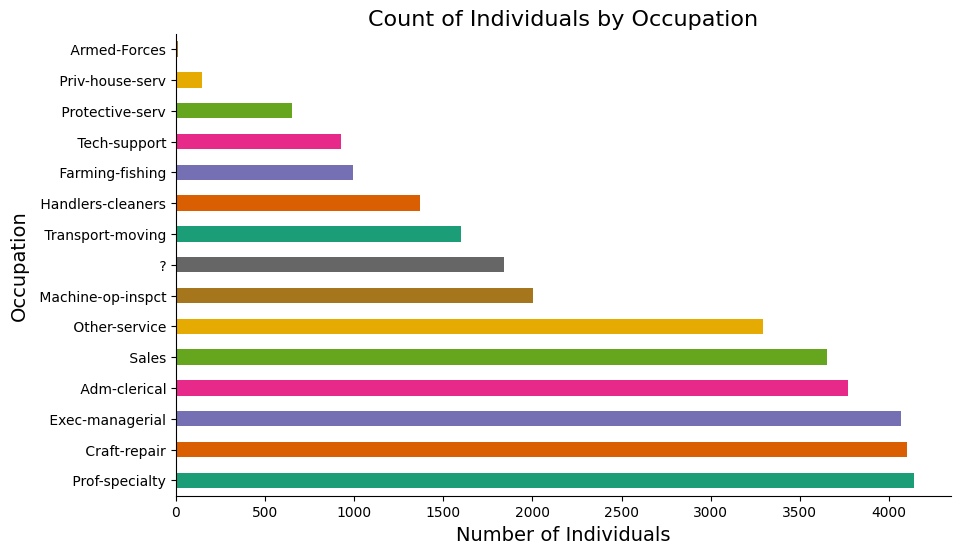

In [18]:
race_counts = data['occupation'].value_counts()

plt.figure(figsize=(10, 6))

race_counts.plot(kind='barh', color=sns.color_palette('Dark2', n_colors=len(race_counts)))
plt.title('Count of Individuals by Occupation', fontsize=16)
plt.xlabel('Number of Individuals', fontsize=14)
plt.ylabel('Occupation', fontsize=14)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

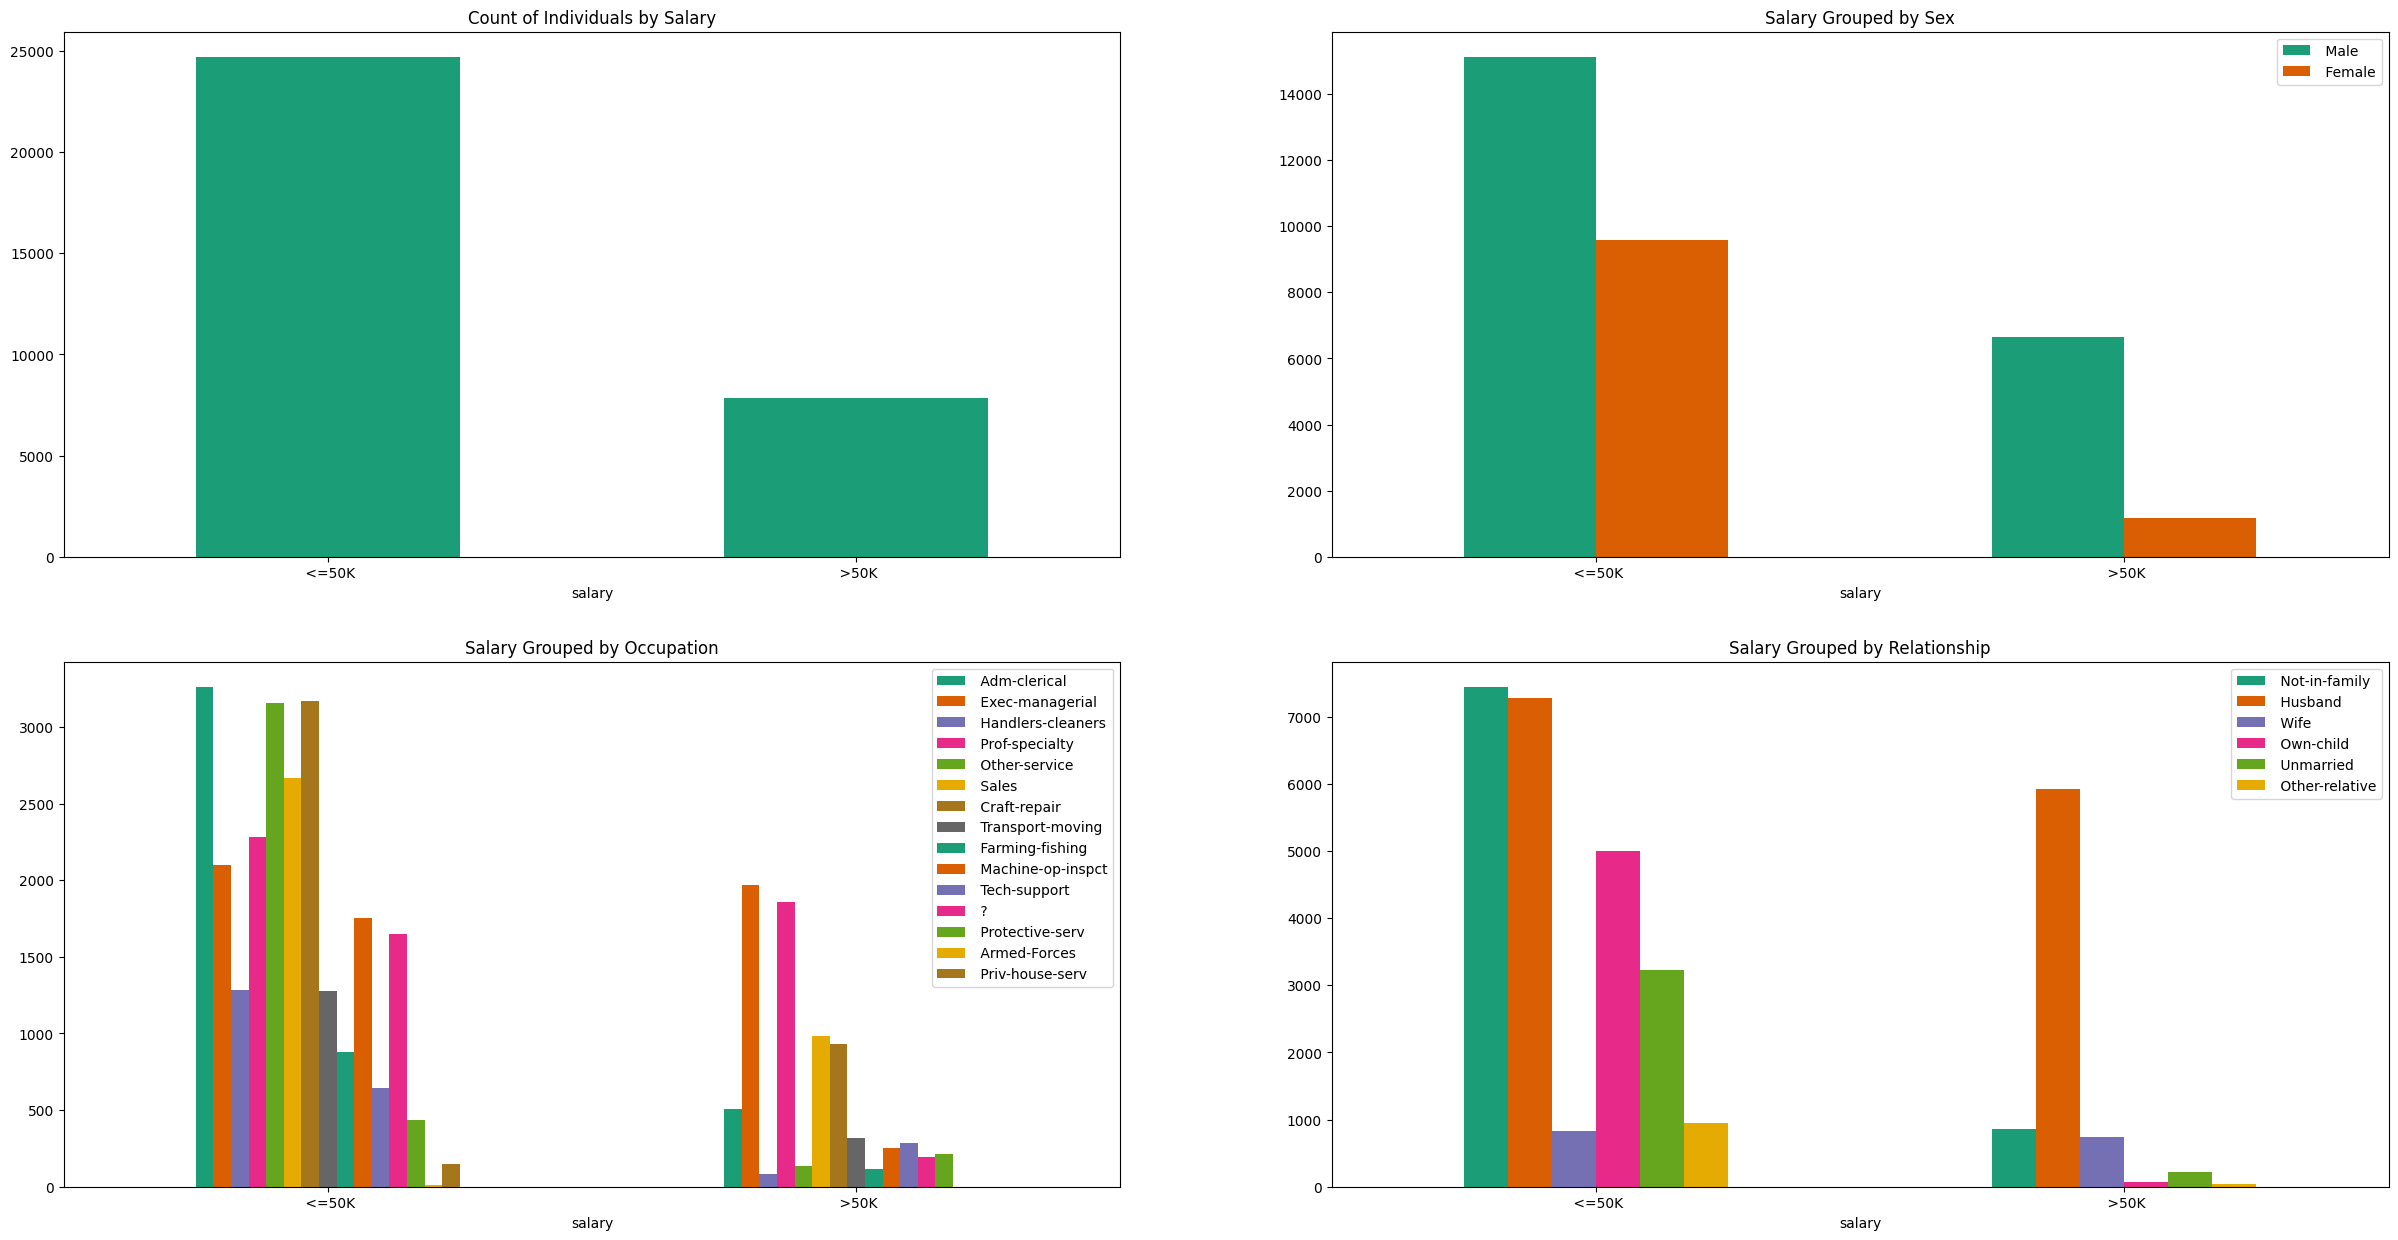

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(30, 15))

data.groupby('salary')['salary'].count().plot(
    kind='bar',
    stacked=False,
    ax=axes[0, 0],
    title='Count of Individuals by Salary',
    rot=False,
)

pd.DataFrame({k: data.groupby(['sex','salary'])['salary'].count()[k] for k in data['sex'].unique()}).plot(
                                kind='bar',
                                ax=axes[0, 1],
                                title='Salary Grouped by Sex',
                                rot=False
                           )
pd.DataFrame(
            {k: data.groupby(['occupation','salary'])['salary'].count()[k] for k in data['occupation'].unique()}
                    ).plot(
                                kind='bar',
                                ax=axes[1, 0],
                                title='Salary Grouped by Occupation',
                                rot=False
                           )
pd.DataFrame(
            {k: data.groupby(['relationship','salary'])['salary'].count()[k] for k in data['relationship'].unique()}
                    ).plot(
                                kind='bar',
                                ax=axes[1, 1],
                                title='Salary Grouped by Relationship',
                                rot=False
                           )
plt.show()

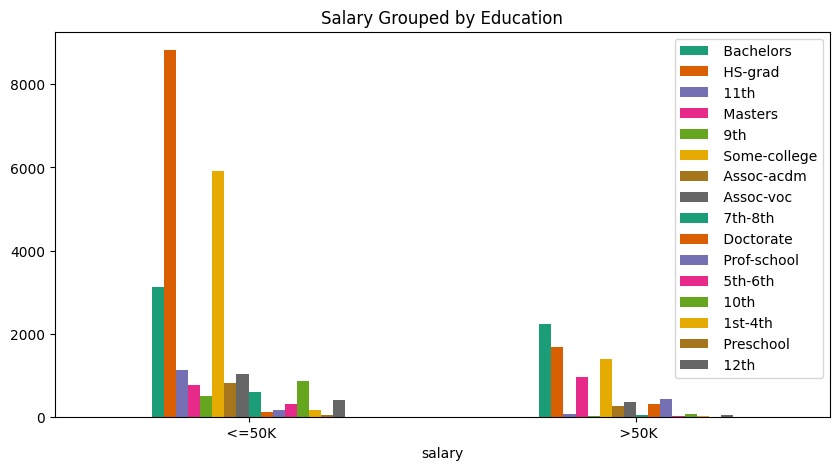

In [20]:

pd.DataFrame(
            {k: data.groupby(['education','salary'])['salary'].count()[k] for k in data['education'].unique()}
                    ).plot(
                                kind='bar',
                                title='Salary Grouped by Education',
                                rot=False,
                                figsize=(10, 5)
                           )
plt.show()

### Dropping Unnecessary Features

In [21]:
data.drop(["fnlwgt", "education-num", "capital-loss"],axis='columns',inplace=True)
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,40,Cuba,<=50K


### Preserving data for PCA section

In [22]:
pca_data = data.copy()


### Categorization of  features

#### Age Categorization

In [23]:
"""For instance, when it comes to age, we want to create categories because there are too many individual values.
                     We can categorize ages into groups such as 1-30, 31-50, and over 50"""
bins = [0, 30, 50, float('inf')]
labels = ['1-30', '31-50', 'Over 50']
data['age'] = pd.cut(data['age'], bins=bins, labels=labels, right=True)

data.head(10)

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,hours-per-week,native-country,salary
0,31-50,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,40,United-States,<=50K
1,31-50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,13,United-States,<=50K
2,31-50,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,40,United-States,<=50K
3,Over 50,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,40,United-States,<=50K
4,1-30,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,40,Cuba,<=50K
5,31-50,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,40,United-States,<=50K
6,31-50,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,16,Jamaica,<=50K
7,Over 50,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,45,United-States,>50K
8,31-50,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,14084,50,United-States,>50K
9,31-50,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,40,United-States,>50K


#### Hours/Week Categorization

In [24]:
bins = [0, 20, 40, 60, float('inf')]
labels = ['Low', 'Average', 'High', 'Very High']

data['hours-per-week'] = pd.cut(data['hours-per-week'], bins=bins, labels=labels, right=True)

data.head(10)

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,hours-per-week,native-country,salary
0,31-50,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,Average,United-States,<=50K
1,31-50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,Low,United-States,<=50K
2,31-50,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,Average,United-States,<=50K
3,Over 50,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,Average,United-States,<=50K
4,1-30,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,Average,Cuba,<=50K
5,31-50,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,Average,United-States,<=50K
6,31-50,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,Low,Jamaica,<=50K
7,Over 50,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,High,United-States,>50K
8,31-50,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,14084,High,United-States,>50K
9,31-50,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,Average,United-States,>50K


#### Capital Gain Categorization

In [25]:
bins = [-1, 15000, float('inf')]
labels = ['<=15K', '>15K']

data['capital-gain'] = pd.cut(data['capital-gain'], bins=bins, labels=labels, right=True)

data.head(10)

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,hours-per-week,native-country,salary
0,31-50,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,<=15K,Average,United-States,<=50K
1,31-50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,<=15K,Low,United-States,<=50K
2,31-50,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,<=15K,Average,United-States,<=50K
3,Over 50,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,<=15K,Average,United-States,<=50K
4,1-30,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,<=15K,Average,Cuba,<=50K
5,31-50,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,<=15K,Average,United-States,<=50K
6,31-50,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,<=15K,Low,Jamaica,<=50K
7,Over 50,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,<=15K,High,United-States,>50K
8,31-50,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,<=15K,High,United-States,>50K
9,31-50,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,<=15K,Average,United-States,>50K


we will refine our dataset by removing features that do not contribute to our analysis. Irrelevant features can introduce noise and negatively impact the performance of our decision tree model. By eliminating redundant or insignificant features, we can create a cleaner dataset that improves accuracy and interpretability in predicting salary outcomes.

### Convert Target Variable to Numerical

In [26]:
data['salary'] = data['salary'].apply(lambda x: 1 if x == ' >50K' else 0)

### Encode Categorical Variables

In [27]:
# One-hot encoding for categorical variables
one_hot_data = pd.get_dummies(data, columns=['age', 'workclass', 'sex', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'native-country','capital-gain','race'], drop_first=True)

In [28]:
one_hot_data.head(10)

,hours-per-week,salary,age_31-50,age_Over 50,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,capital-gain_>15K,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,Average,0,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,Low,0,True,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
2,Average,0,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
3,Average,0,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False
4,Average,0,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
5,Average,0,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
6,Low,0,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
7,High,1,False,True,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
8,High,1,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
9,Average,1,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True


### Separate Features & Target Variable

In [29]:
# Separate features and target variable
X = one_hot_data.drop(columns=['salary'])
y = data['salary']

In [30]:
X.head()

,hours-per-week,age_31-50,age_Over 50,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,capital-gain_>15K,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,Average,True,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
1,Low,True,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
2,Average,True,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,Average,False,True,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4,Average,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [31]:
y.head(10)

,salary
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,1
9,1


## ID3 Utility Functions

### Entropy

In [83]:
def calcute_entropy(target_feature):
    # Example: If target_feature = ['Yes', 'Yes', 'No', 'Yes', 'No'], then classes would be ['No', 'Yes'], and counts would be [2, 3].
    classes, counts = np.unique(target_feature, return_counts=True)

    # Calculating entropy using the formula: -Σ(p * log2(p))
    total = counts.sum()
    probs = counts / total

    entropy = -(probs * np.log2(probs)).sum()
    return entropy

### Information Gain



The info_gain function measures how much uncertainty (entropy) is reduced by splitting the dataset on a specific feature. If the Information Gain is high, it means that splitting on that feature effectively organizes the data and reduces impurity, making it a good candidate for building a decision tree.

Example: If split_attribute_name is "Outlook" and the values are ["Sunny", "Rainy", "Sunny", "Overcast"], vals would be ["Overcast", "Rainy", "Sunny"] and counts would be [1, 1, 2].

In [84]:
def info_gain(data, split_attribute_name, target_name):
    # Calculate the total entropy of the target variable
    total_entropy = calcute_entropy(data[target_name])

    # Get unique values of the split attribute and their counts
    vals, counts = np.unique(data[split_attribute_name], return_counts=True)

    # Calculate the weighted entropy for the split attribute
    split_ents = list()
    total = counts.sum()

    for i in range(len(vals)):
      val = vals[i]
      cnt = counts[i]

      # column = f'{split_attribute_name}_{val}'

      # target_column_by_val = one_hot_data[one_hot_data[column]]['salary']
      target_column_by_val = data[data[split_attribute_name] == val][target_name]
      entropy = calcute_entropy(target_feature=target_column_by_val)
      split_ents.append(entropy)

    split_ents = np.array(split_ents)
    weighted_entropy = ((counts / total) * split_ents).sum()

    # Calculate information gain as the difference between total and weighted entropy
    info_gain = total_entropy - weighted_entropy
    return info_gain  # Return the calculated information gain

### ID3

In [85]:
def id3(data, original_data, features, target_attribute_name, parent_node_class=None, IG_threshold=0):
    # If all samples belong to the same class, return that class
    if len(data[target_attribute_name].unique()) == 1:
        return data[target_attribute_name].unique()[0], 0

    # If there are no samples left, return the most common class from the original data ??
    elif len(data) == 0:
        return np.unique(original_data[target_attribute_name])[np.argmax(np.unique(original_data[target_attribute_name], return_counts=True)[1])], 0


    # If there are no features left to split on, return the parent's class
    elif len(features) == 0:
        return parent_node_class, 0


    else:
        # Determine the most common class in the current data
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])]

        # Calculate information gain for each feature
        item_values = [info_gain(data, feature, target_attribute_name) for feature in features]
        best_feature_index = np.argmax(item_values) # Find the index of the best feature

        # Informatin gain limiting
        # print('...................')
        # print(f' ig: {np.max(item_values)}')
        # print(f'ig th is : {IG_threshold}')
        # print(np.max(item_values) < IG_threshold)
        if np.max(item_values) < IG_threshold:
          # print(f'pruned with ig: {item_values[best_feature_index]}')
          return parent_node_class, 0

        best_feature = features[best_feature_index]   # Get the best feature

        # Initialize the tree with the best feature
        tree = {best_feature: {}}

        # Remove the best feature from the list of features
        remaining_features = [f for f in features if f != best_feature]

        # Track the height of the current level's subtrees
        max_subtree_height = 0

        # For each unique value of the best feature, create a subtree
        for value in np.unique(data[best_feature]):
            sub_data = data[data[best_feature] == value]
            subtree, subtree_height = id3(sub_data, data, remaining_features, target_attribute_name, parent_node_class, IG_threshold)  # Recursive call
            tree[best_feature][value] = subtree  # Add the subtree to the tree

            max_subtree_height = max(max_subtree_height, subtree_height)

        return tree, max_subtree_height + 1  # Return the constructed tree


### Prediction Function

In [86]:
def predict(tree, instance):
  if not(isinstance(tree, dict)):
    return tree
  attr = next(iter(tree))

  attr_value = instance[attr]


  if attr_value in tree[attr]:
    subtree = tree[attr][attr_value]
    return predict(subtree, instance)
  else:
    return None
    print('I was wrong, there is none')

### Evaluation Function

In [87]:
def evaluate(tree, test_data, target_attr_name, label=None, height=None):
  outcomes = {'tp':0, 'fp':0, 'tn':0, 'fn':0}

  # Iterating over data for inference
  for idx, row in tqdm(test_data.iterrows(), total=test_data.shape[0]):

    # Recording Inference Time
    start_time = time.time()
    y_hat = predict(tree, row)
    end_time = time.time()

    y = row[target_attr_name]

    # Evaluating outcome of the model vs true label
    if y_hat == 1 and y == 1:
      outcomes['tp'] += 1

    elif y_hat == 0 and y == 0:
      outcomes['tn'] += 1

    elif y_hat == 1 and y == 0:
      outcomes['fp'] += 1

    elif y_hat == 0 and y == 1:
      outcomes['fn'] += 1


  # Calculating scores
  scores = {'Accuracy': 0, 'F1-Score': 0, 'Precision':0, 'Recall':0, 'Height':0, 'Outcomes':outcomes, 'Inference Time': end_time - start_time}

  scores['Accuracy'] = (outcomes['tp'] + outcomes['tn']) / len(test_data)
  scores['Precision'] = outcomes['tp'] / (outcomes['tp'] + outcomes['fp'] + 1)
  scores['Recall'] = outcomes['tp'] / (outcomes['tp'] + outcomes['fn'] + 1)

  if scores['Recall'] != 0 or scores['Precision'] != 0:
    scores['F1-Score'] = 2 * scores['Precision'] * scores['Recall'] / (scores['Recall'] + scores['Precision'])
  else:
    scores['F1-Score'] = 0

  scores['Height'] = height

  return scores

### Plotting Functions

#### Draw Confusion Matrix Function

In [88]:
def draw_confusion_matrix(outcomes):
  conf_array = np.array([[outcomes['tp'], outcomes['fn']],
                         [outcomes['fp'], outcomes['tn']]])

  confusion_df = pd.DataFrame(conf_array,
                            index=['Actual Positive', 'Actual Negative'],
                            columns=['Predicted Positive', 'Predicted Negative'])


  plt.figure(figsize=(6, 6))
  sns.heatmap(confusion_df, annot=True, fmt="d", cmap="Blues", cbar=False)
  plt.title("Confusion Matrix")
  plt.show()

#### Plotting Results
I wrote these functions using ChatGPT

In [89]:
# Function to get appropriate y limits with padding
def get_y_limits(data, is_metric=False):
      min_val = min(data)
      max_val = max(data)
      if is_metric:  # For accuracy, precision, recall, f1
          return -0.25, 1.0
      else:
          range_val = max_val - min_val
          padding = range_val * 0.1  # 10% padding
          return -0.25, max_val + padding

In [90]:
def plot_evaluation(history):
  # Style
  plt.style.use('fivethirtyeight')

  fig, axes = plt.subplots(1, 3, figsize=(25, 4))

  # Styling parameters
  plot_kwargs = {
      'marker': 'o',
      'markersize': 4,
      'linewidth': 2,
      'alpha': 0.7
  }

  # Accuracy Plot
  accuracy_data = [score['Accuracy'] for score in history]
  axes[0].plot(interval, accuracy_data,
                color='#2ecc71',
                label='Accuracy',
                **plot_kwargs)
  axes[0].set_title('Model Accuracy', pad=15)
  axes[0].set_ylabel('Accuracy Score')
  axes[0].grid(True, alpha=0.3)
  axes[0].set_ylim(*get_y_limits(accuracy_data, True))

  # Precision-Recall Plot
  precision_data = [score['Precision'] for score in history]
  recall_data = [score['Recall'] for score in history]
  axes[1].plot(interval, precision_data,
              color='#e74c3c',
              label='Precision',
              **plot_kwargs)
  axes[1].plot(interval, recall_data,
              color='#3498db',
              label='Recall',
              **plot_kwargs)
  axes[1].set_title('Precision and Recall', pad=15)
  axes[1].legend(frameon=True, loc='upper right')
  axes[1].grid(True, alpha=0.3)
  axes[1].set_ylim(*get_y_limits(precision_data + recall_data, True))

  # F1-Score Plot
  f1_data = [score['F1-Score'] for score in history]
  axes[2].plot(interval, f1_data,
              color='#9b59b6',
              label='F1-Score',
              **plot_kwargs)
  axes[2].set_title('F1 Score', pad=15)
  axes[2].set_ylabel('F1 Score')
  axes[2].grid(True, alpha=0.3)
  axes[2].set_ylim(*get_y_limits(f1_data, True))



  # Adjust layout and spacing
  plt.tight_layout()
  plt.subplots_adjust(top=0.92)

  # background color to white for better visibility
  fig.patch.set_facecolor('white')
  for ax in axes.flat:
    ax.set_facecolor('white')

  plt.show()

In [91]:
def plot_h_t(history):
  fig, axes = plt.subplots(1, 2, figsize=(20, 4))
  # fig.suptitle('Model Performance Metrics Over Time', fontsize=16, y=0.95)

  # Common styling parameters
  plot_kwargs = {
      'marker': 'o',
      'markersize': 4,
      'linewidth': 2,
      'alpha': 0.7
  }

  # Height Plot
  height_data = [score['Height'] for score in history]
  axes[0].plot(interval, height_data,
              color='#f1c40f',
              label='Height',
              **plot_kwargs)
  axes[0].set_title('Tree\'s Height', pad=15)
  axes[0].set_ylabel('Height')
  axes[0].grid(True, alpha=0.3)
  axes[0].set_ylim(*get_y_limits(height_data))

  # Inference Time Plot
  time_data = [score['Inference Time'] * 1e5 for score in history]
  axes[1].plot(interval, time_data,
              color='#1abc9c',
              label='Inference Time',
              **plot_kwargs)
  axes[1].set_title('Inference Time', pad=10)
  axes[1].set_ylabel('Time (1e-5 s)')
  axes[1].grid(True, alpha=0.3)
  axes[1].set_ylim(*get_y_limits(time_data))


  # Adjust layout and spacing
  plt.tight_layout()
  plt.subplots_adjust(top=0.92)

  # Set background color to white for better visibility
  fig.patch.set_facecolor('white')
  for ax in axes.flat:
    ax.set_facecolor('white')

  plt.show()

## Training and Evaluation


### Splitting Data  

In [42]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=['salary']), data['salary'], random_state= 104, test_size=0.2, shuffle=True)

train_data = x_train.assign(salary=y_train)
test_data = x_test.assign(salary=y_test)

### Experimenting with a range of IG threshold values

In [43]:
interval = np.linspace(0, 2e-1, 11)
columns = [column for column in x_train.columns]

history = []

for ig_th in interval:

  tree, h = id3(data=train_data, original_data=train_data, features=columns, target_attribute_name='salary', IG_threshold=ig_th)
  scores = evaluate(tree, test_data, 'salary', height=h)
  history.append(scores)

100%|██████████| 6513/6513 [00:00<00:00, 18417.85it/s]


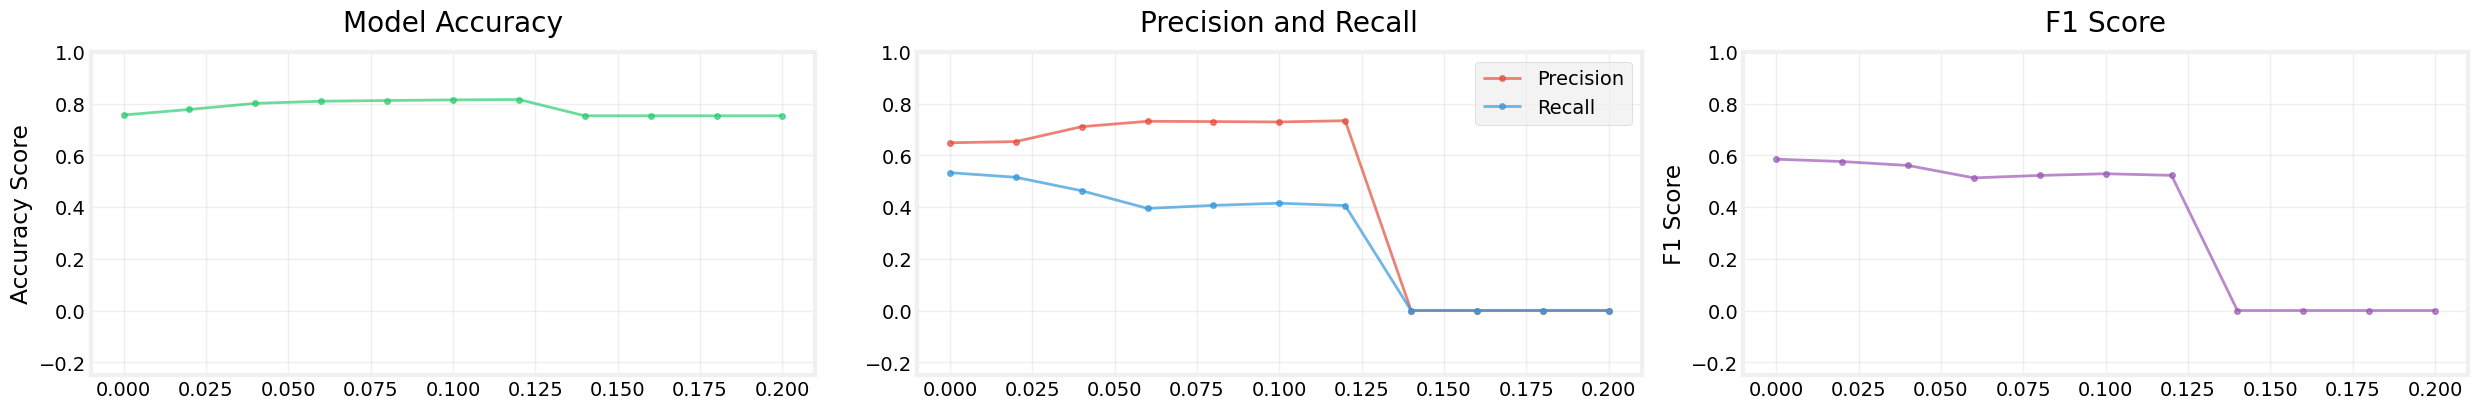

In [44]:
plot_evaluation(history)

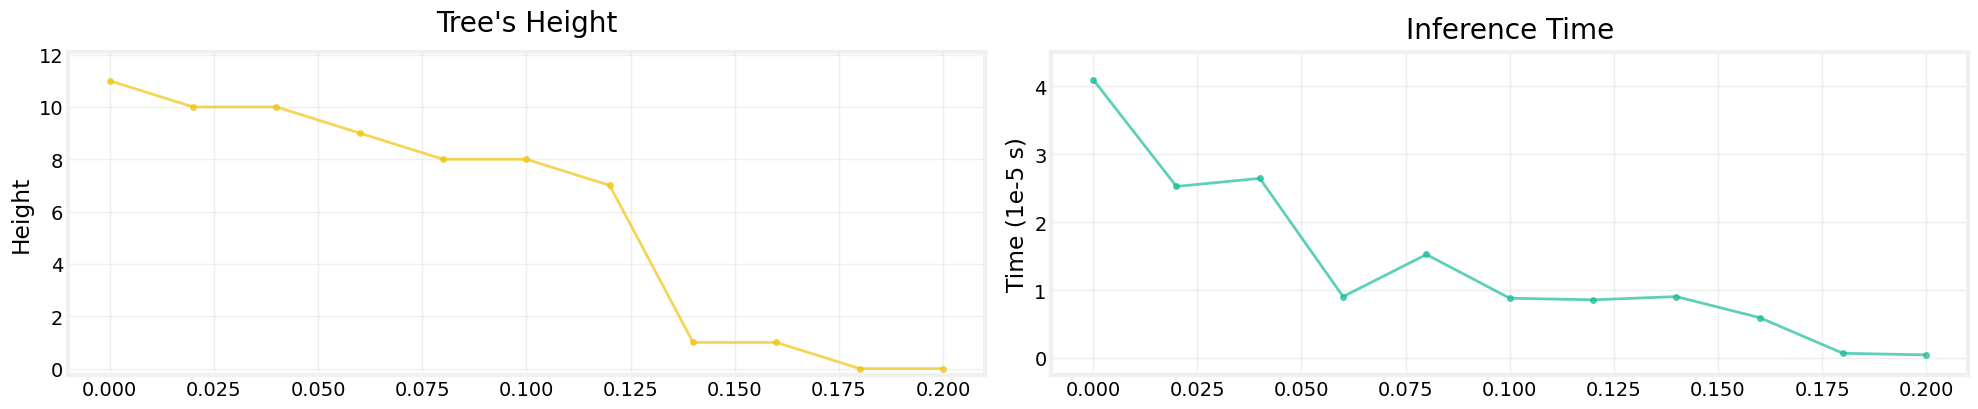

In [45]:
plot_h_t(history)

In [47]:
best_tree_idx = np.argmax([score['Accuracy'] for score in history])
print(interval[best_tree_idx])
print(history[best_tree_idx])

0.12
{'Accuracy': 0.8162137263933671, 'F1-Score': 0.5228548516439455, 'Precision': 0.7342342342342343, 'Recall': 0.40597758405977585, 'Height': 7, 'Outcomes': {'tp': 652, 'fp': 235, 'tn': 4664, 'fn': 953}, 'Inference Time': 8.58306884765625e-06}


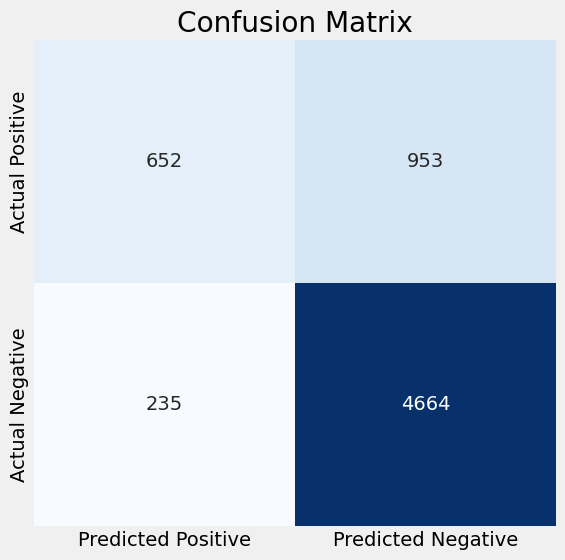

In [48]:
draw_confusion_matrix(history[best_tree_idx]['Outcomes'])

Text(0.5, 1.0, 'Inference Time Plot')

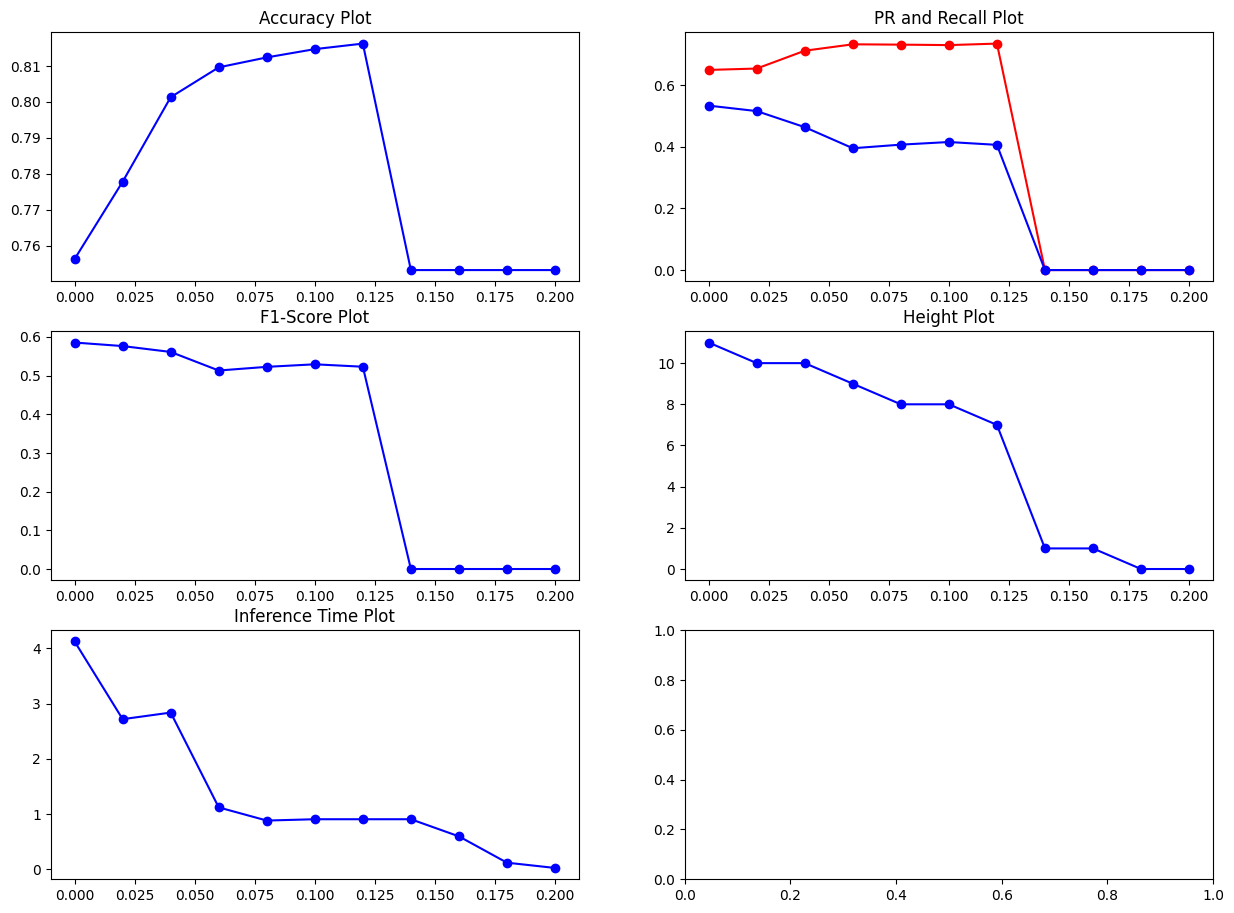

In [ ]:
# My code for Plotting
# fig, axes = plt.subplots(3, 2, figsize=(15, 11))

# axes[0,0].plot(interval, [score['Accuracy'] for score in history], color = 'blue', marker='o')
# axes[0,0].set_title('Accuracy Plot')
# axes[0,1].plot(interval, [score['Precision'] for score in history], color = 'red', label='Precision', marker='o')
# axes[0,1].plot(interval, [score['Recall'] for score in history], color = 'blue', label='Recall', marker='o')
# axes[0,1].set_title('PR and Recall Plot')
# axes[1,0].plot(interval, [score['F1-Score'] for score in history], color = 'blue', marker='o')
# axes[1,0].set_title('F1-Score Plot')
# axes[1,1].plot(interval, [score['Height'] for score in history], color = 'blue', marker='o')
# axes[1,1].set_title('Height Plot')
# axes[2,0].plot(interval, [score['Inference Time'] * 1e5 for score in history], color = 'blue', marker='o')
# axes[2,0].set_title('Inference Time Plot')


### K best Algorithm

In [49]:
copy_data = data.copy()

In [50]:
from sklearn.preprocessing import LabelEncoder
encoded_data = copy_data.copy()
for col in copy_data.columns:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(encoded_data[col])

In [51]:
encoded_data

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,hours-per-week,native-country,salary
0,1,7,9,4,1,1,4,1,0,0,39,0
1,1,6,9,2,4,0,4,1,0,2,39,0
2,1,4,11,0,6,1,4,1,0,0,39,0
3,2,4,1,2,6,0,2,1,0,0,39,0
4,0,4,9,2,10,5,2,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,4,7,2,13,5,4,0,0,0,39,0
32557,1,4,11,2,7,0,4,1,0,0,39,1
32558,2,4,11,6,1,4,4,0,0,0,39,0
32559,0,4,11,4,1,3,4,1,0,2,39,0


In [52]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   education       32561 non-null  int64
 3   marital-status  32561 non-null  int64
 4   occupation      32561 non-null  int64
 5   relationship    32561 non-null  int64
 6   race            32561 non-null  int64
 7   sex             32561 non-null  int64
 8   capital-gain    32561 non-null  int64
 9   hours-per-week  32561 non-null  int64
 10  native-country  32561 non-null  int64
 11  salary          32561 non-null  int64
dtypes: int64(12)
memory usage: 3.0 MB


In [53]:
print("\nUnique Data in Each Column:")
print("*******************")
for column in encoded_data.columns:
    unique_values = encoded_data[column].unique()
    print(f"{column}: {len(unique_values)} unique values")
    print(unique_values)
    print("=======================================")



Unique Data in Each Column:
*******************
age: 3 unique values
[1 2 0]
workclass: 9 unique values
[7 6 4 1 2 0 5 8 3]
education: 16 unique values
[ 9 11  1 12  6 15  7  8  5 10 14  4  0  3 13  2]
marital-status: 7 unique values
[4 2 0 3 5 1 6]
occupation: 15 unique values
[ 1  4  6 10  8 12  3 14  5  7 13  0 11  2  9]
relationship: 6 unique values
[1 0 5 3 4 2]
race: 5 unique values
[4 2 1 0 3]
sex: 2 unique values
[1 0]
capital-gain: 2 unique values
[0 1]
hours-per-week: 4 unique values
[0 2 1 3]
native-country: 42 unique values
[39  5 23 19  0 26 35 33 16  9  2 11 20 30 22 31  4  1 37  7 25 36 14 32
  6  8 10 13  3 24 41 29 28 34 38 12 27 40 17 21 18 15]
salary: 2 unique values
[0 1]


In [54]:
from sklearn.feature_selection import SelectKBest, chi2

# Separate features and target
X_encoded = encoded_data.drop('salary', axis=1)
y_encoded = encoded_data['salary']

# Ensure all values are non-negative for chi2
if (X_encoded < 0).any().any():
    raise ValueError("Chi2 requires non-negative feature values. Please normalize the data.")


BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X_encoded, y_encoded)


df_scores = pd.DataFrame(fit.scores_, columns=['Score'])
df_columns = pd.DataFrame(X_encoded.columns, columns=['Feature'])
f_Scores = pd.concat([df_columns, df_scores], axis=1)
f_Scores = f_Scores.sort_values(by='Score', ascending=False)

print(f_Scores)

           Feature        Score
5     relationship  3659.143125
8     capital-gain  1866.708560
3   marital-status  1123.469818
0              age  1113.205134
4       occupation   504.558854
7              sex   502.439419
2        education   297.942270
9   hours-per-week   199.266889
1        workclass    47.508119
6             race    33.031305
10  native-country    13.619256


#### 4 Features

In [55]:
sub1 = data.copy()
subset1 = sub1[["relationship", "capital-gain", "marital-status" , "age",  "salary"]]

In [56]:
subset1.head(2)

,relationship,capital-gain,marital-status,age,salary
0,Not-in-family,<=15K,Never-married,31-50,0
1,Husband,<=15K,Married-civ-spouse,31-50,0


In [57]:
#spliting data
x_train1, x_test1, y_train1, y_test1 = train_test_split(subset1.drop(columns=['salary']), subset1['salary'], random_state= 104, test_size=0.2, shuffle=True)

train_data1 = x_train1.assign(salary=y_train1)
test_data1 = x_test1.assign(salary=y_test1)

In [58]:
train_data1.head(2)

,relationship,capital-gain,marital-status,age,salary
11752,Husband,<=15K,Married-civ-spouse,Over 50,1
22345,Not-in-family,<=15K,Married-spouse-absent,Over 50,0


In [59]:
interval = np.linspace(0, 2e-1, 11)
columns = [column for column in x_train1.columns]

history1 = []

for ig_th in interval:

  tree1, h = id3(data=train_data1, original_data=train_data1, features=columns, target_attribute_name='salary', IG_threshold=ig_th)
  scores = evaluate(tree1, test_data1, 'salary', height=h)
  history1.append(scores)

100%|██████████| 6513/6513 [00:00<00:00, 18749.19it/s]


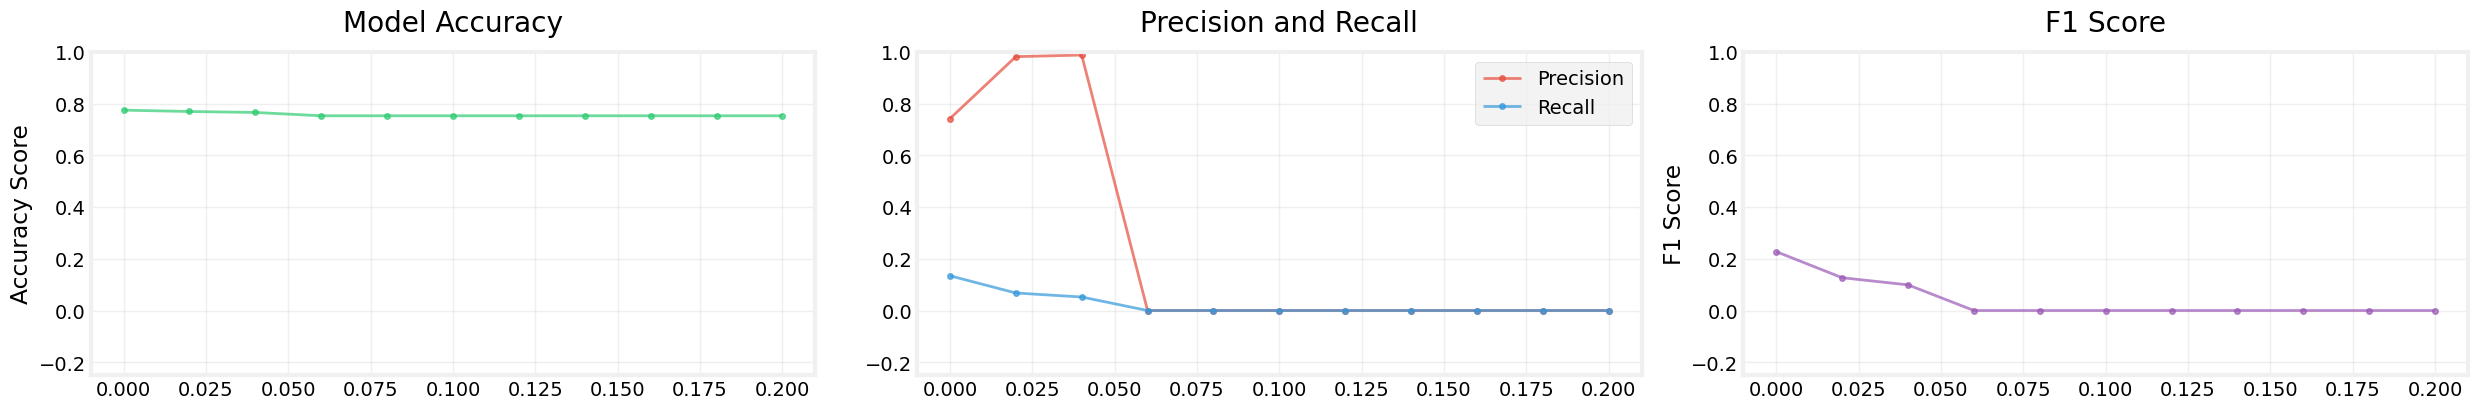

In [60]:
plot_evaluation(history1)

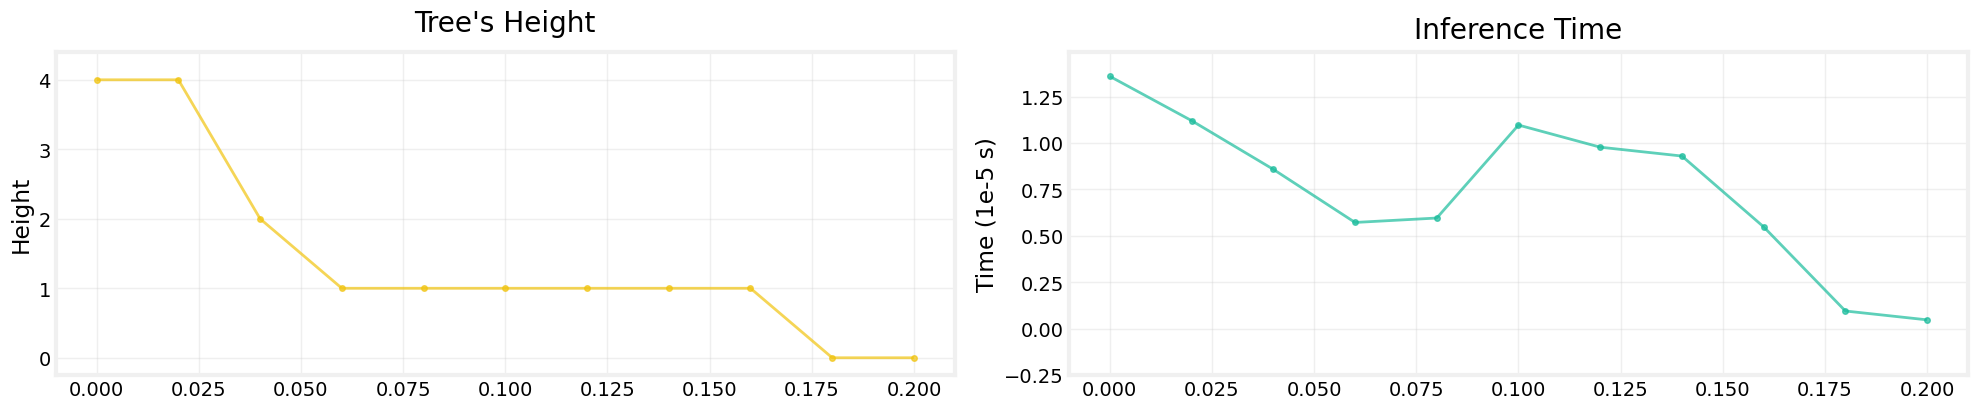

In [61]:
plot_h_t(history1)

In [62]:
best_run_idx = np.argmax([score['Accuracy'] for score in history1])
print(interval[best_run_idx])
print(history1[best_run_idx])

0.0
{'Accuracy': 0.7750652541071703, 'F1-Score': 0.22760800842992623, 'Precision': 0.7422680412371134, 'Recall': 0.134411947728687, 'Height': 4, 'Outcomes': {'tp': 216, 'fp': 74, 'tn': 4832, 'fn': 1390}, 'Inference Time': 1.3589859008789062e-05}


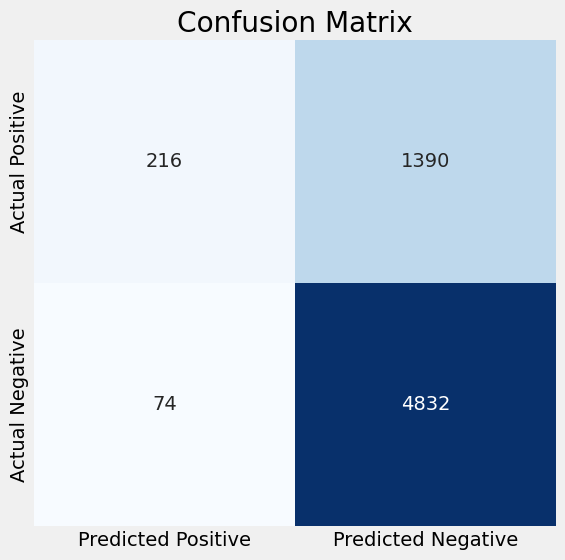

In [64]:
draw_confusion_matrix(history1[best_run_idx]['Outcomes'])

#### 8 Features

In [65]:
sub2 = data.copy()
subset2 = sub2[["relationship", "capital-gain", "marital-status" , "age", 'occupation', 'sex' ,"education" , "hours-per-week" , "salary"]]
subset2.head(2)

,relationship,capital-gain,marital-status,age,occupation,sex,education,hours-per-week,salary
0,Not-in-family,<=15K,Never-married,31-50,Adm-clerical,Male,Bachelors,Average,0
1,Husband,<=15K,Married-civ-spouse,31-50,Exec-managerial,Male,Bachelors,Low,0


In [66]:
#spliting data
x_train2, x_test2, y_train2, y_test2 = train_test_split(subset2.drop(columns=['salary']), subset2['salary'], random_state= 104, test_size=0.2, shuffle=True)

train_data2 = x_train2.assign(salary=y_train1)
test_data2 = x_test2.assign(salary=y_test1)

train_data2.head(2)

,relationship,capital-gain,marital-status,age,occupation,sex,education,hours-per-week,salary
11752,Husband,<=15K,Married-civ-spouse,Over 50,Craft-repair,Male,Some-college,Average,1
22345,Not-in-family,<=15K,Married-spouse-absent,Over 50,Sales,Male,5th-6th,Average,0


In [67]:
interval = np.linspace(0, 2e-1, 11)
columns = [column for column in x_train2.columns]

history2 = []

for ig_th in interval:

  tree2, h = id3(data=train_data2, original_data=train_data2, features=columns, target_attribute_name='salary', IG_threshold=ig_th)
  scores = evaluate(tree2, test_data2, 'salary', height=h)
  history2.append(scores)

100%|██████████| 6513/6513 [00:00<00:00, 19414.02it/s]


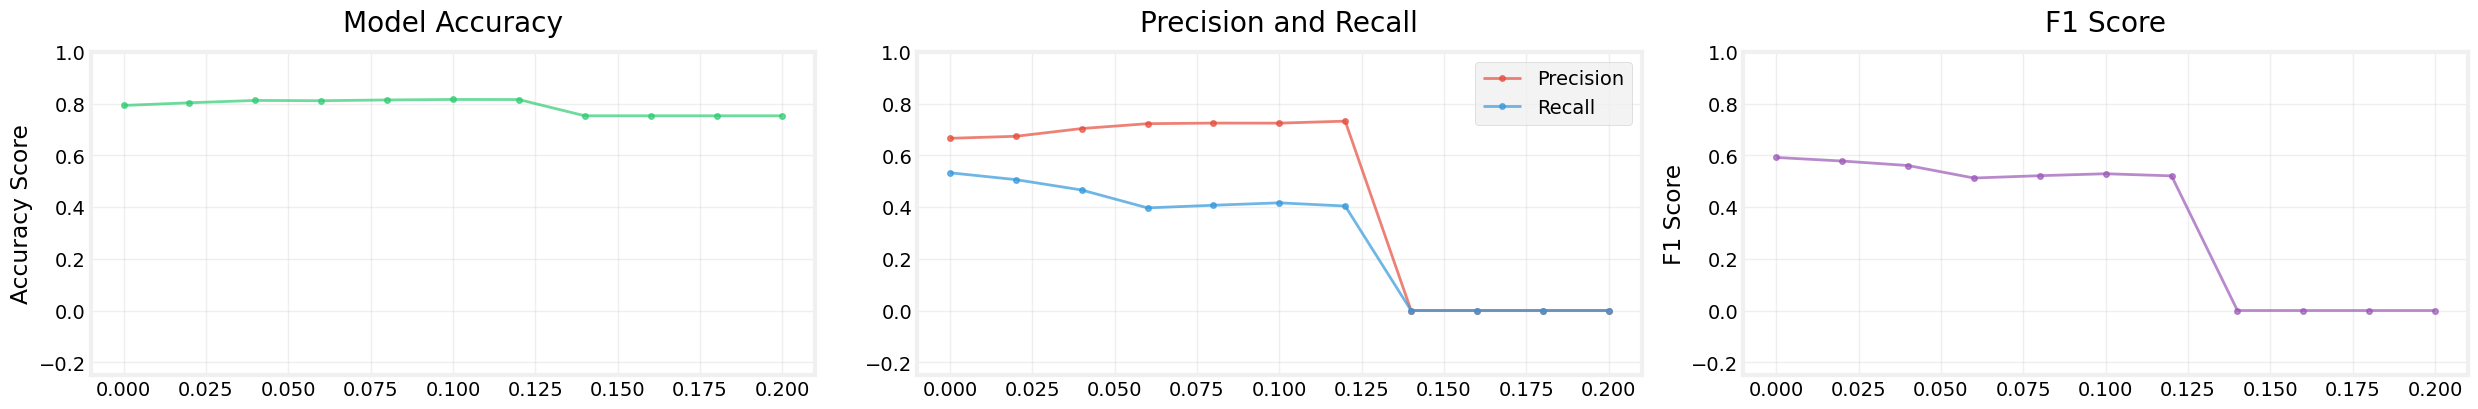

In [68]:
plot_evaluation(history2)

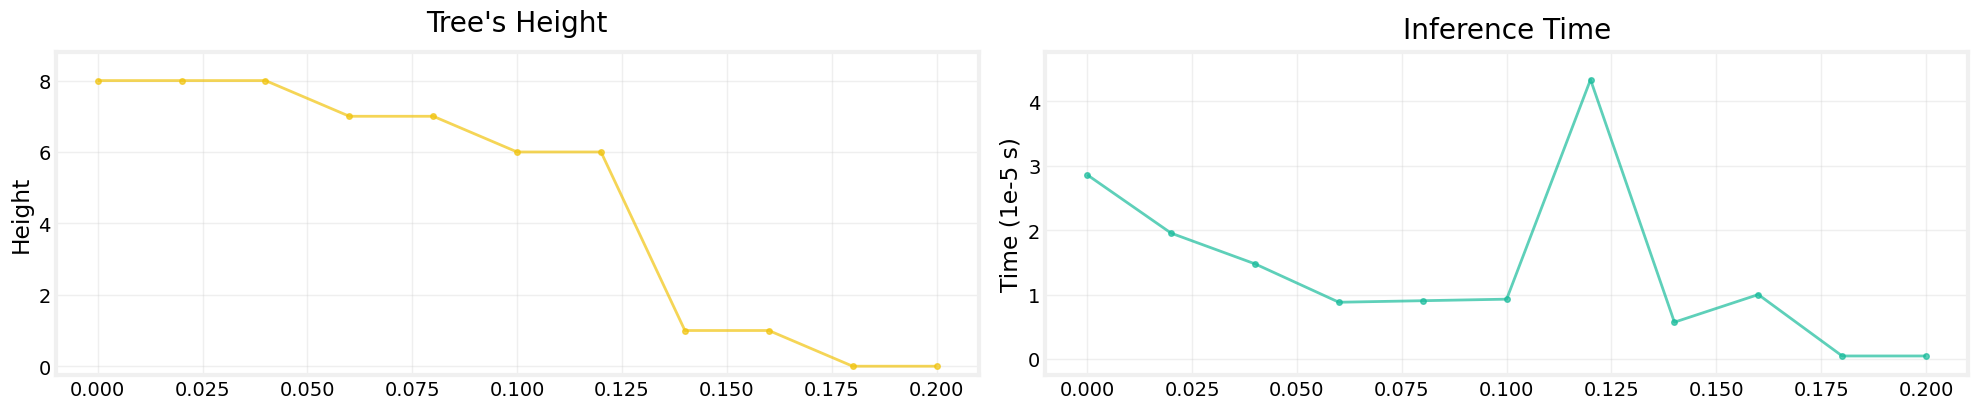

In [69]:
plot_h_t(history2)

In [70]:
best_run_idx = np.argmax([score['Accuracy'] for score in history2])
print(interval[best_run_idx])
print(history2[best_run_idx])

0.1
{'Accuracy': 0.8163672654690619, 'F1-Score': 0.5290628706998814, 'Precision': 0.7248104008667389, 'Recall': 0.4165628891656289, 'Height': 6, 'Outcomes': {'tp': 669, 'fp': 253, 'tn': 4648, 'fn': 936}, 'Inference Time': 9.298324584960938e-06}


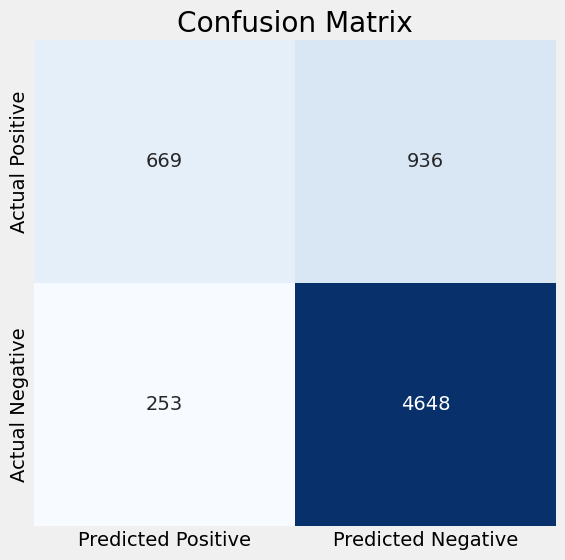

In [71]:
draw_confusion_matrix(history2[best_run_idx]['Outcomes'])

## For Fun: PCA On Data

I will use `pca_data` dataframe beacause i want to keep the continous featues.

In [72]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [73]:
pca_data['salary'] = pca_data['salary'].apply(lambda x: 1 if x == ' >50K' else 0)

In [74]:
X = pca_data.drop(columns=['salary'])
columns = X.columns

In [75]:
cont_features = ['age', 'capital-gain', 'hours-per-week']
cat_features = list(set(columns) - set(cont_features))

In [76]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), cont_features),   # Standardize continuous features
        ('cat', OneHotEncoder(drop='first'), cat_features)  # Encode categorical features
    ]
)

In [77]:
processed_X = preprocessor.fit_transform(X)

In [78]:
pca = PCA(n_components=2)  # Choose the number of components
X_pca = pca.fit_transform(processed_X)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("PCA Components:\n", X_pca)

Explained Variance Ratio: [0.19662321 0.14387496]
PCA Components:
 [[-0.13188977  0.1629965 ]
 [-0.14636193 -1.72592118]
 [-0.12031815 -0.08378876]
 ...
 [ 0.74231729 -1.11046961]
 [-2.09365507  0.05380626]
 [ 1.6384276   0.36132814]]


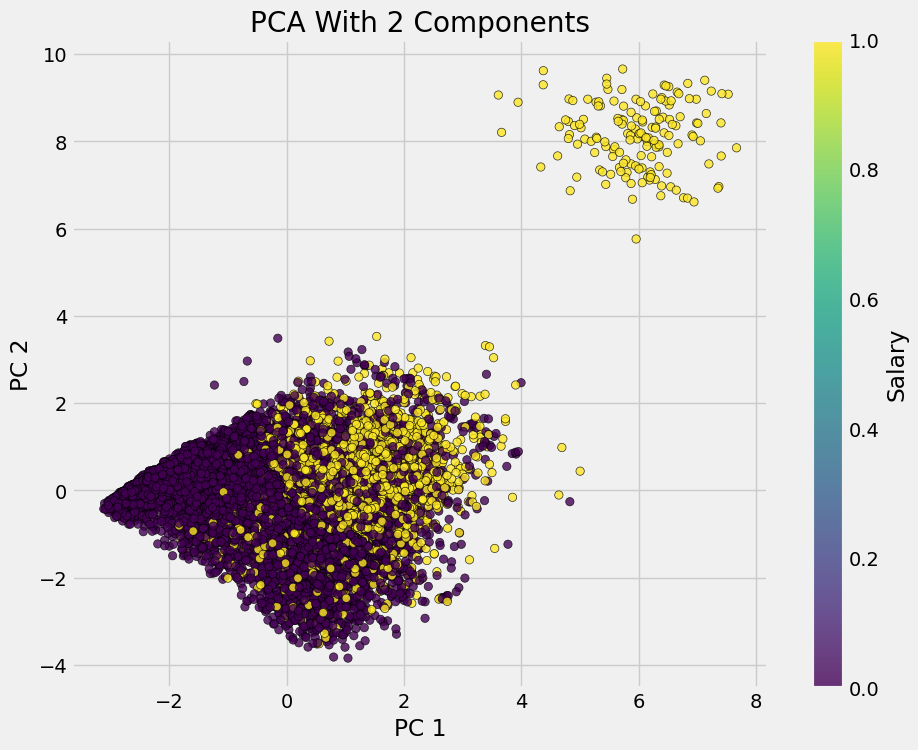

In [80]:
# Scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pca_data['salary'], cmap='viridis', edgecolor='k', alpha=0.8)

# Adding a colorbar
plt.colorbar(scatter, label='Salary')

# Labeling the plot
plt.title("PCA With 2 Components")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.show()

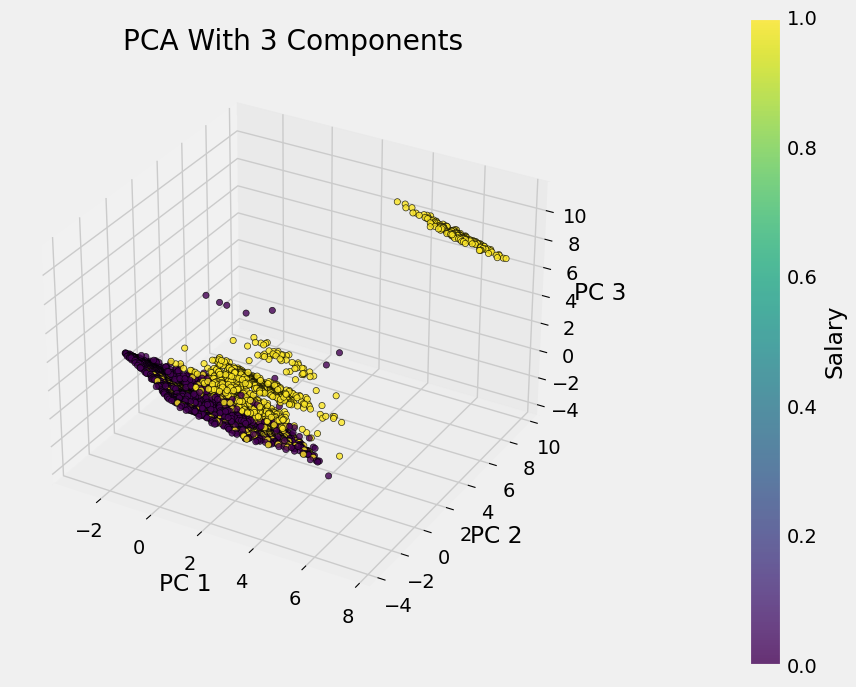

In [82]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming PCA was performed with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(processed_X)  # Adjust `X_processed` to your preprocessed data

# Example: Target values for coloring the points
target = pca_data['salary']  # Replace with your target column

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data
scatter = ax.scatter(
    X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
    c=target, cmap='viridis', edgecolor='k', alpha=0.8
)

# Adding labels and title
ax.set_title("PCA With 3 Components")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")

# Adding a color bar
cbar = fig.colorbar(scatter, ax=ax, pad=0.2)
cbar.set_label('Salary')

plt.show()
